In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df = titanic_df.drop(['Cabin'], axis=1)

In [6]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [7]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

<Axes: >

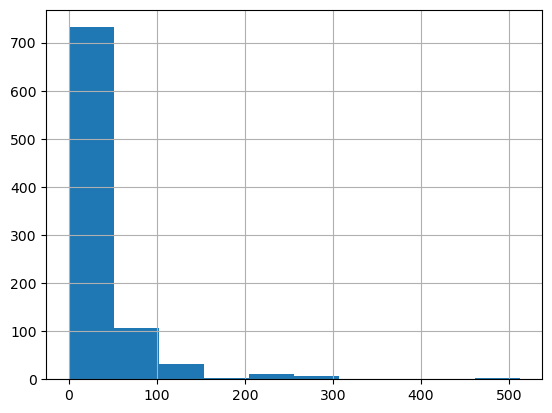

In [8]:
titanic_df.Fare.hist()

In [9]:
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

titanic_df['Fare'] = titanic_df['Fare'].clip(lower_bound, upper_bound)

<Axes: >

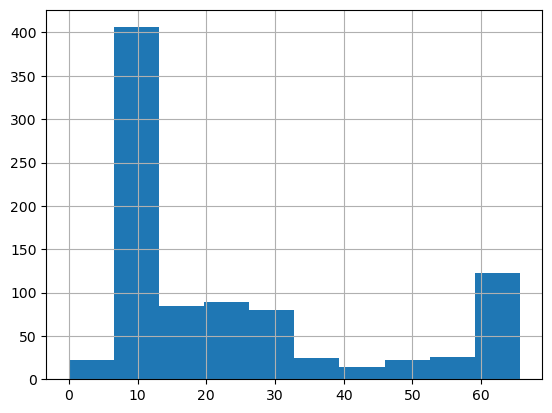

In [10]:
titanic_df.Fare.hist()

<Axes: >

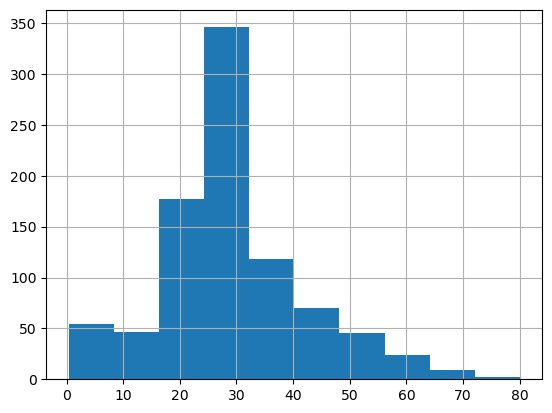

In [11]:
titanic_df.Age.hist()

In [12]:
# Data standardization
sc = StandardScaler()
titanic_df['Age'] = sc.fit_transform(titanic_df[['Age']])
titanic_df['Fare'] = sc.fit_transform(titanic_df[['Fare']])

feature engineering

In [13]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [14]:
lb = LabelEncoder()
titanic_df['Sex'] = lb.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = lb.fit_transform(titanic_df['Embarked'])

In [15]:
titanic_df = pd.concat([titanic_df, pd.get_dummies(titanic_df['Title'], prefix='Title')], axis=1)

In [16]:
titanic_df = titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Title'], axis=1)

In [17]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt,Title_Col,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,3,1,-0.592481,1,0,-0.820552,2,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1,1,0,0.638789,1,0,2.031623,0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,0,-0.284663,0,0,-0.787578,2,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,0,0.407926,1,0,1.419297,2,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,3,1,0.407926,0,0,-0.781471,2,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,0,0,-0.539655,2,False,False,...,False,False,False,False,False,False,False,True,False,False
887,1,1,0,-0.823344,0,0,0.290823,2,False,False,...,False,True,False,False,False,False,False,False,False,False
888,0,3,0,0.000000,1,2,-0.029155,2,False,False,...,False,True,False,False,False,False,False,False,False,False
889,1,1,1,-0.284663,0,0,0.290823,0,False,False,...,False,False,False,False,True,False,False,False,False,False


In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Sex                 891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   Embarked            891 non-null    int64  
 8   Title_Capt          891 non-null    bool   
 9   Title_Col           891 non-null    bool   
 10  Title_Don           891 non-null    bool   
 11  Title_Dr            891 non-null    bool   
 12  Title_Jonkheer      891 non-null    bool   
 13  Title_Lady          891 non-null    bool   
 14  Title_Major         891 non-null    bool   
 15  Title_Master        891 non-null    bool   
 16  Title_Mi

In [19]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop(['Survived'], axis=1), titanic_df['Survived'], test_size=0.2, train_size=0.8, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.8268156424581006